# Estudi Gaussian Mixture amb Modificacions

## Utilització GridSearch

In [1]:
import pandas as pd

In [2]:
# Lectura fitxer 
df_students = pd.read_csv("datasets/Data Carrard.csv")
df_students = df_students.drop('id', axis = 1)

df_categorical = df_students[['sex', 'year', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt']]
df_numerical = df_students[['age', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']]

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_numerical)

# Create a PCA instance: pca
pca = PCA(n_components=0.95)

# Fit the PCA instance to the scaled samples
pca.fit(df_num_scaled)

# Transform the scaled samples: pca_features
pca_features = pca.transform(df_num_scaled)

### Busquem millor model

In [4]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
from sklearn.model_selection import GridSearchCV

def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(2, 8),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)

### Aplicació millor model 

In [28]:
grid_search.fit(pca_features) 

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(2, 8)},
             scoring=<function gmm_bic_score at 0x0000020CDB72CB80>)

In [29]:
print("Millor model:", grid_search.best_params_)

Millor model: {'covariance_type': 'diag', 'n_components': 2}


In [30]:
clusters = grid_search.predict(pca_features)

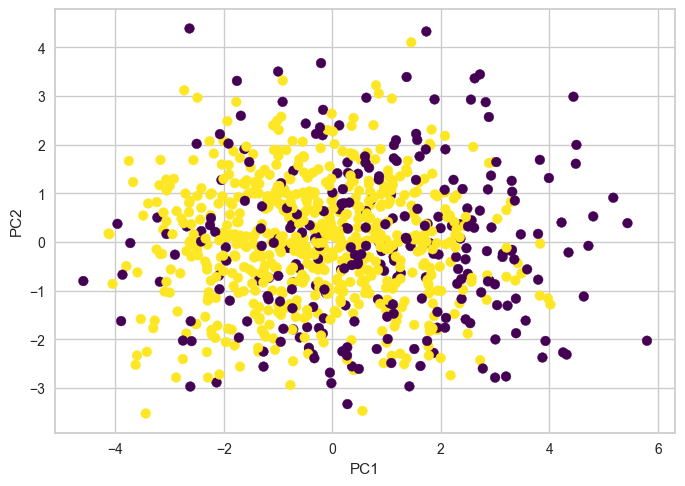

In [31]:
# scatter plot of the first two principal components
plt.scatter(pca_features[:,0], pca_features[:,1], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [32]:
cluster_labels = grid_search.predict(pca_features)
df_clustered = df_numerical.copy() 
df_clustered['Cluster'] = cluster_labels 

In [33]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('Cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

               age        jspe   qcae_cog   qcae_aff       amsp  erec_mean  \
Cluster                                                                      
0        23.609023  105.695489  58.879699  33.943609  24.097744   0.690924   
1        21.858065  106.666129  58.374194  35.145161  22.743548   0.732680   

              cesd     stai_t     mbi_ex     mbi_cy     mbi_ea  
Cluster                                                         
0        23.605263  46.304511  19.330827  12.770677  23.063910  
1        15.667742  41.437097  15.825806   8.924194  24.698387  


In [34]:
# Getting the number of patients in each cluster
cluster_grouped.size()

Cluster
0    266
1    620
dtype: int64

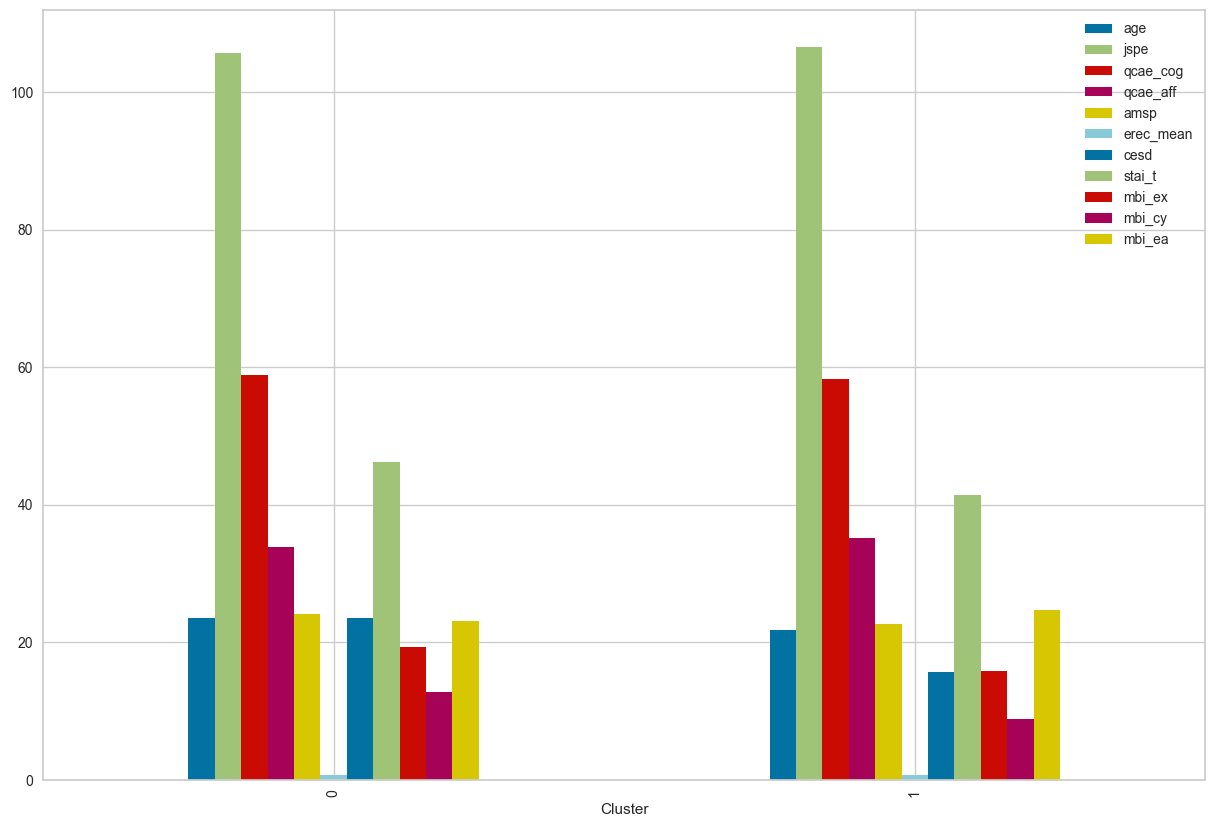

In [35]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

### Machine Learning

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [37]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(pca_features, cluster_labels, test_size=0.2, random_state=42) # 80% training and 20% test data sets

# Create a logistic regression classifier
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.8202247191011236


### Avaluació model

In [22]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [38]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 34  18]
 [ 14 112]]
              precision    recall  f1-score   support

           0       0.71      0.65      0.68        52
           1       0.86      0.89      0.88       126

    accuracy                           0.82       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.82      0.82      0.82       178



## Utilització stud_h com a numèric

In [40]:
import pandas as pd

# Lectura fitxer 
df_students = pd.read_csv("datasets/Data Carrard.csv")
df_students = df_students.drop('id', axis = 1)

df_categorical = df_students[['sex', 'year', 'glang', 'part', 'job', 'health', 'psyt']]
df_numerical = df_students[['age', 'stud_h', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']]

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_numerical)

# Create a PCA instance: pca
pca = PCA(n_components=0.95)

# Fit the PCA instance to the scaled samples
pca.fit(df_num_scaled)

# Transform the scaled samples: pca_features
pca_features = pca.transform(df_num_scaled)

### Aplicació model

In [42]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [43]:
n_grups = 3
model_gm = GaussianMixture(n_components=n_grups)
clusters = model_gm.fit_predict(pca_features)

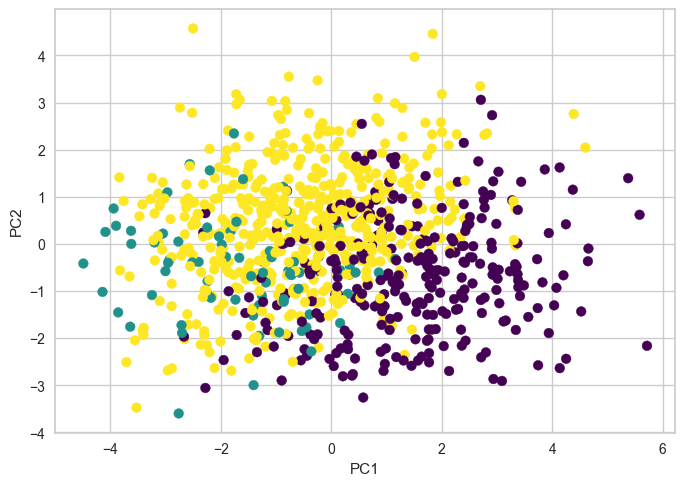

In [44]:
# scatter plot of the first two principal components
plt.scatter(pca_features[:,0], pca_features[:,1], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [45]:
cluster_labels = model_gm.predict(pca_features)
df_clustered = df_numerical.copy() 
df_clustered['Cluster'] = cluster_labels 

In [46]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('Cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

               age     stud_h        jspe   qcae_cog   qcae_aff       amsp  \
Cluster                                                                      
0        22.709790  25.258741  109.118881  60.479021  36.339161  23.465035   
1        27.575342  21.013699  110.410959  59.643836  32.547945  25.315068   
2        21.487666  25.897533  104.326376  57.311195  34.250474  22.679317   

         erec_mean       cesd     stai_t     mbi_ex     mbi_cy     mbi_ea  
Cluster                                                                    
0         0.726190  26.506993  49.622378  20.391608  14.146853  21.723776  
1         0.685258  11.000000  35.630137  14.150685   6.904110  26.917808  
2         0.721695  14.438330  40.256167  15.349146   8.311195  25.180266  


In [47]:
# Getting the number of patients in each cluster
cluster_grouped.size()

Cluster
0    286
1     73
2    527
dtype: int64

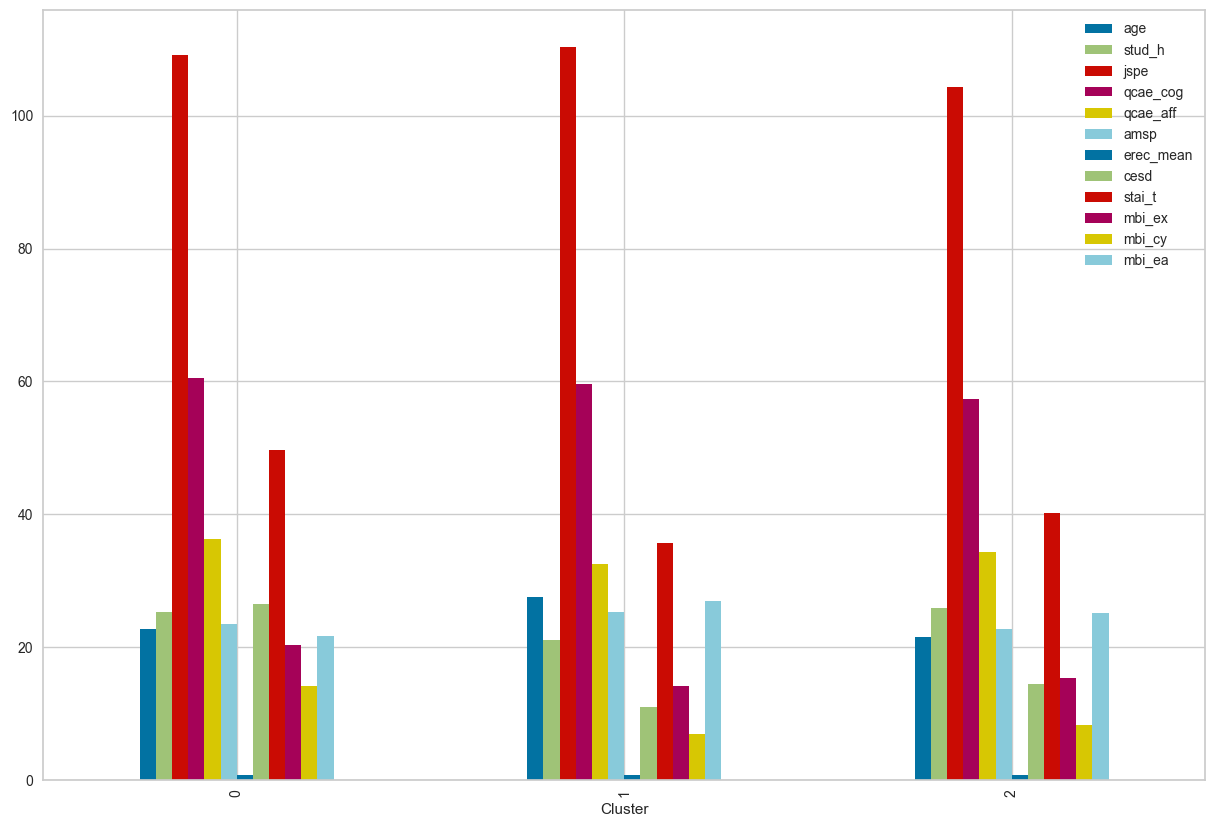

In [48]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

### Machine Learning

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [50]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(pca_features, cluster_labels, test_size=0.2, random_state=42) # 80% training and 20% test data sets

# Create a logistic regression classifier
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.9044943820224719


### Avaluació model

In [51]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [52]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[52  0  7]
 [ 0 11  4]
 [ 5  1 98]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        59
           1       0.92      0.73      0.81        15
           2       0.90      0.94      0.92       104

    accuracy                           0.90       178
   macro avg       0.91      0.85      0.88       178
weighted avg       0.90      0.90      0.90       178

